## Drzewa Decyzyjne | Lab 05 - "Minimalizacja przeuczenia"

In [1]:
# Imports

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import pandas as pd

### Data loading & splitting

In [2]:
# Load the data

X, y = load_wine(return_X_y=True)
X.shape, y.shape

((178, 13), (178,))

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model definition & training

In [4]:
# Define and train the model

model = DecisionTreeClassifier()

In [5]:
# Train and evaluate the model (compare train vs. test accuracy)

model.fit(X_train, y_train)
y_pred_test = model.predict(X_test)

accuracy_test = accuracy_score(y_true=y_test, y_pred=y_pred_test)
accuracy_train = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
precision_test = precision_score(y_true=y_test, y_pred=y_pred_test, average="weighted")
recall_test = recall_score(y_true=y_test, y_pred=y_pred_test, average="weighted")
f1_test = f1_score(y_true=y_test, y_pred=y_pred_test, average="weighted")

print("Model metrics:")
print(f"Accuracy (test): {accuracy_test:.4f}")
print(f"Accuracy (train): {accuracy_train:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1: {f1_test:.4f}")

Model metrics:
Accuracy (test): 0.9444
Accuracy (train): 1.0000
Precision: 0.9463
Recall: 0.9444
F1: 0.9440


In [6]:
if ((accuracy_train - accuracy_test) * 100) > 1.0:
    print(f"Model might be overfitting. Train accuracy ({(accuracy_train * 100):.2f}%) difference: {((accuracy_train - accuracy_test) * 100):.2f}%.")
else:
    print("No clear overfitting detected.")

Model might be overfitting. Train accuracy (100.00%) difference: 5.56%.


### Limiting tree depth (preventing model overfitting)

In [7]:
# Split the data again

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model_limited_depth = DecisionTreeClassifier(max_depth=3)

In [9]:
model_limited_depth.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy_test_limited = accuracy_score(y_true=y_test, y_pred=y_pred)
accuracy_train_limited = accuracy_score(y_true=y_train, y_pred=model.predict(X_train))
precision_test_limited = precision_score(y_true=y_test, y_pred=y_pred, average="weighted")
recall_test_limited = recall_score(y_true=y_test, y_pred=y_pred, average="weighted")
f1_test_limited = f1_score(y_true=y_test, y_pred=y_pred, average="weighted")

print("Limited depth model's metrics:")
print(f"Accuracy (test, max_depth): {accuracy_test_limited:.4f}")
print(f"Accuracy (train, max_depth): {accuracy_train_limited:.4f}")
print(f"Accuracy (test, default): {accuracy_test:.4f}")
print(f"Accuracy (train, default): {accuracy_train:.4f}")
print(f"Precision: {precision_test_limited:.4f}")
print(f"Recall: {recall_test_limited:.4f}")
print(f"F1: {f1_test_limited:.4f}")

Limited depth model's metrics:
Accuracy (test, max_depth): 0.9444
Accuracy (train, max_depth): 1.0000
Accuracy (test, default): 0.9444
Accuracy (train, default): 1.0000
Precision: 0.9463
Recall: 0.9444
F1: 0.9440


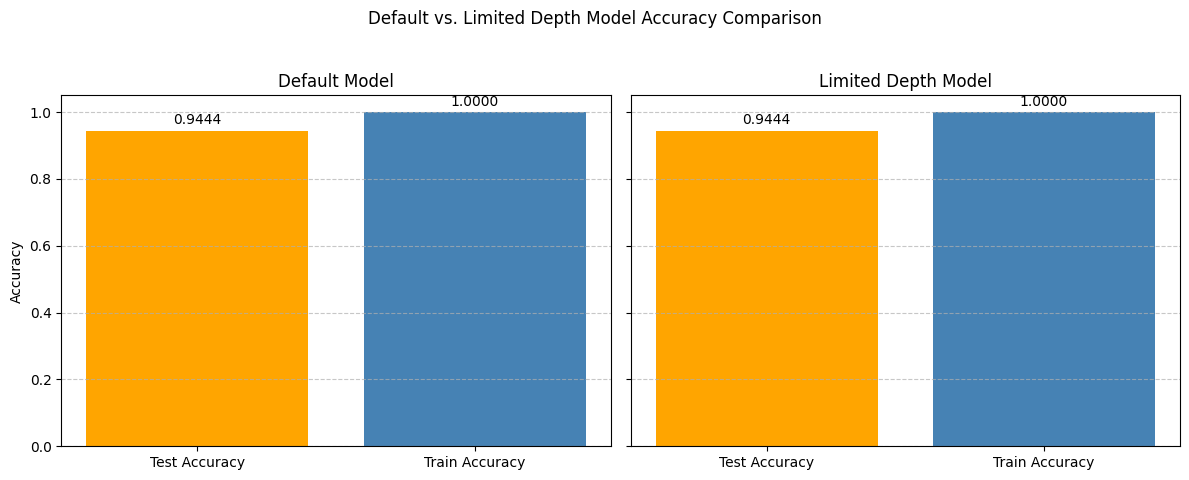

In [10]:
# Plot model accuracy for easy visual comparison

labels = ["Test Accuracy", "Train Accuracy"]
colors = ["orange", "steelblue"]

accuracies_default = [accuracy_test, accuracy_train]
accuracies_limited = [accuracy_test_limited, accuracy_train_limited]

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

axes[0].bar(labels, accuracies_default, color=colors)
axes[0].set_title("Default Model")
axes[0].set_ylabel("Accuracy")
axes[0].set_ylim(0, 1.05)
axes[0].grid(axis="y", linestyle="--", alpha=0.7)

for i, acc in enumerate(accuracies_default):
    axes[0].text(i, acc + 0.01, f"{acc:.4f}", ha='center', va='bottom')

axes[1].bar(labels, accuracies_limited, color=colors)
axes[1].set_title("Limited Depth Model")
axes[1].set_ylim(0, 1.05)
axes[1].grid(axis="y", linestyle="--", alpha=0.7)

for i, acc in enumerate(accuracies_limited):
    axes[1].text(i, acc + 0.01, f"{acc:.4f}", ha='center', va='bottom')

plt.suptitle("Default vs. Limited Depth Model Accuracy Comparison")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
# Test other Tree parameters

max_depth_values = [3, 5, 7, None]
param_accuracy_dict = {}

for max_depth in max_depth_values:
    temp_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    temp_model.fit(X_train, y_train)

    temp_y_pred_test = temp_model.predict(X_test)
    temp_y_pred_train = temp_model.predict(X_train)

    test_accuracy = accuracy_score(y_test, temp_y_pred_test)
    train_accuracy = accuracy_score(y_train, temp_y_pred_train)

    param_accuracy_dict[max_depth] = {
        "test_accuracy": test_accuracy,
        "train_accuracy": train_accuracy
    }

for depth, scores in param_accuracy_dict.items():
    print(f"max_depth = {depth}")
    print(f"Test Accuracy:  {scores['test_accuracy']:.4f}")
    print(f"Train Accuracy: {scores['train_accuracy']:.4f}\n")

max_depth = 3
Test Accuracy:  0.9444
Train Accuracy: 0.9930

max_depth = 5
Test Accuracy:  0.9444
Train Accuracy: 1.0000

max_depth = 7
Test Accuracy:  0.9444
Train Accuracy: 1.0000

max_depth = None
Test Accuracy:  0.9444
Train Accuracy: 1.0000



### Obserwacje

- Powyżej _max_depth=3_ model zaczyna zwracać wartość accuracy na poziomie ~1.0, co może zaczynać świadczyć o przeuczeniu.

In [12]:
from itertools import product

# Define parameters to test
param_dict = {
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 2, 5]
}

results = []

# Iterate over all combinations of parameter values
for split, leaf in product(param_dict["min_samples_split"], param_dict["min_samples_leaf"]):
    model = DecisionTreeClassifier(min_samples_split=split, min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    overfit_gap = train_acc - test_acc

    # Store current iter results
    results.append({
        "min_samples_split": split,
        "min_samples_leaf": leaf,
        "train_accuracy": train_acc,
        "test_accuracy": test_acc,
        "overfit_gap": overfit_gap
    })

# Output results
for res in results:
    print(f"min_samples_split = {res['min_samples_split']}, min_samples_leaf = {res['min_samples_leaf']}")
    print(f"  Train Accuracy:  {(res['train_accuracy'] * 100.0):.2f}%")
    print(f"  Test Accuracy:   {(res['test_accuracy'] * 100.0):.2f}%")
    print(f"  Overfit Gap:     {(res['overfit_gap'] * 100.0):.2f}%\n")


min_samples_split = 2, min_samples_leaf = 1
  Train Accuracy:  100.00%
  Test Accuracy:   94.44%
  Overfit Gap:     5.56%

min_samples_split = 2, min_samples_leaf = 2
  Train Accuracy:  98.59%
  Test Accuracy:   94.44%
  Overfit Gap:     4.15%

min_samples_split = 2, min_samples_leaf = 5
  Train Accuracy:  97.18%
  Test Accuracy:   94.44%
  Overfit Gap:     2.74%

min_samples_split = 10, min_samples_leaf = 1
  Train Accuracy:  99.30%
  Test Accuracy:   94.44%
  Overfit Gap:     4.85%

min_samples_split = 10, min_samples_leaf = 2
  Train Accuracy:  98.59%
  Test Accuracy:   94.44%
  Overfit Gap:     4.15%

min_samples_split = 10, min_samples_leaf = 5
  Train Accuracy:  97.18%
  Test Accuracy:   94.44%
  Overfit Gap:     2.74%

min_samples_split = 20, min_samples_leaf = 1
  Train Accuracy:  99.30%
  Test Accuracy:   94.44%
  Overfit Gap:     4.85%

min_samples_split = 20, min_samples_leaf = 2
  Train Accuracy:  98.59%
  Test Accuracy:   94.44%
  Overfit Gap:     4.15%

min_samples_split 

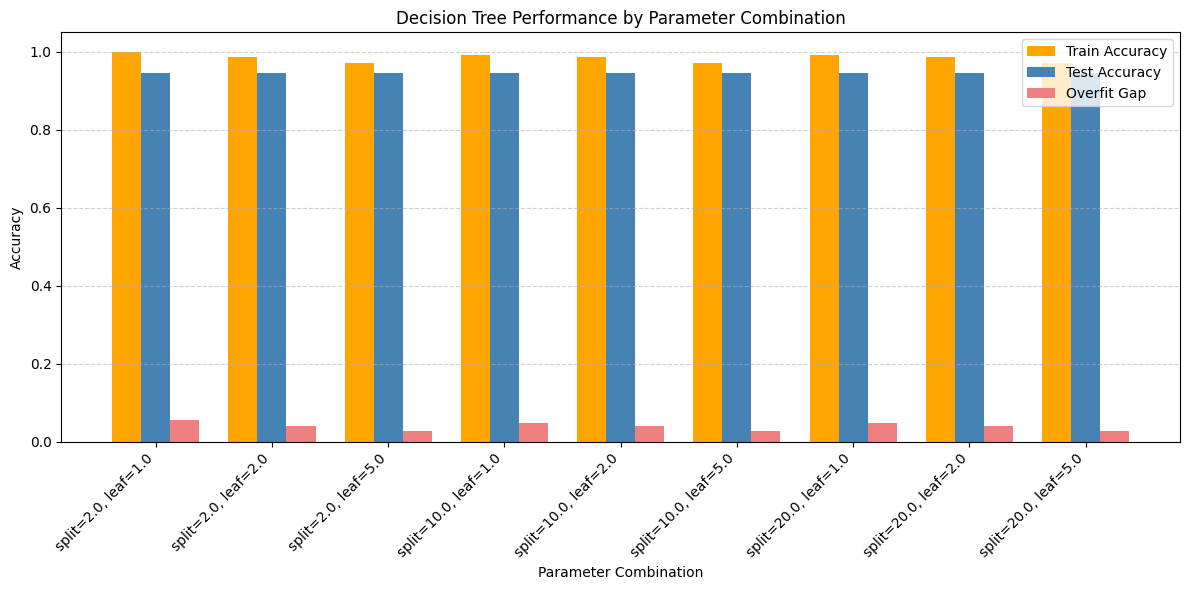

In [13]:
# Convert results to PD dataframe for easier processing
df_results = pd.DataFrame(results)

# Create a label for each param combination
df_results['param_combo'] = df_results.apply(
    lambda row: f"split={row['min_samples_split']}, leaf={row['min_samples_leaf']}", axis=1
)

plt.figure(figsize=(12, 6))
bar_width = 0.25
index = range(len(df_results))

plt.bar([i - bar_width for i in index], df_results['train_accuracy'], width=bar_width, label='Train Accuracy', color='orange')
plt.bar(index, df_results['test_accuracy'], width=bar_width, label='Test Accuracy', color='steelblue')
plt.bar([i + bar_width for i in index], df_results['overfit_gap'], width=bar_width, label='Overfit Gap', color='lightcoral')

plt.xlabel('Parameter Combination')
plt.ylabel('Accuracy')
plt.title('Decision Tree Performance by Parameter Combination')
plt.xticks(index, df_results['param_combo'], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()

### Post pruning (ccp_alpha)

In [14]:
# Train another regular model with max_depth == None

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=None, random_state=42)
model.fit(X_train, y_train)
y_pred_no_param = model.predict(X_test)

accuracy_test_no_param = accuracy_score(y_test, y_pred_no_param)
accuracy_train_no_param = accuracy_score(y_train, model.predict(X_train))

print(f"Accuracy no param (train): {accuracy_train_no_param:.4f}")
print(f"Accuracy no param (test): {accuracy_test_no_param:.4f}")

Accuracy no param (train): 1.0000
Accuracy no param (test): 0.9444


In [15]:
clf = DecisionTreeClassifier(random_state=42) # Define a default model
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total impurity vs. alpha for training set')

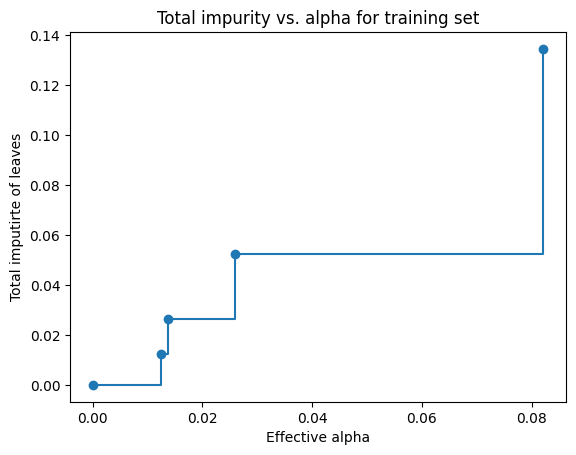

In [16]:
# Plot the alpha value vs. the imputiry

fix, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total imputirte of leaves")
ax.set_title("Total impurity vs. alpha for training set")

In [17]:
# Train the tree models using different alpha parameter values

clf_results = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    clf.fit(X_train, y_train)
    temp_pred_test = clf.predict(X_test)

    temp_accuracy_test = accuracy_score(y_test, temp_y_pred_test)
    temp_accuracy_train = accuracy_score(y_train, clf.predict(X_train))

    clf_results.append({
        "alpha": ccp_alpha,
        "accuracy_train": temp_accuracy_train,
        "accuracy_test": temp_accuracy_test
    })

In [18]:
for res in clf_results:
    print(f"Alpha: {res["alpha"]}")
    print(f"Accuracy train: {res["accuracy_train"]}")
    print(f"Accuracy test: {res["accuracy_test"]}\n{'-' * 40}\n")

Alpha: 0.0
Accuracy train: 1.0
Accuracy test: 0.9444444444444444
----------------------------------------

Alpha: 0.012519561815336462
Accuracy train: 0.9929577464788732
Accuracy test: 0.9444444444444444
----------------------------------------

Alpha: 0.013802816901408456
Accuracy train: 0.9859154929577465
Accuracy test: 0.9444444444444444
----------------------------------------

Alpha: 0.026013001083423602
Accuracy train: 0.971830985915493
Accuracy test: 0.9444444444444444
----------------------------------------

Alpha: 0.08212832550860721
Accuracy train: 0.9225352112676056
Accuracy test: 0.9444444444444444
----------------------------------------

Alpha: 0.2623158561335511
Accuracy train: 0.4014084507042254
Accuracy test: 0.9444444444444444
----------------------------------------



#### Rezultaty

- Spośród testowanych wartości _alpha_, wartość **0.026013001083423602**, dała najlepsze skutki.
- Model z tą wartością _ccp_alpha_ zbliżył wynik accuracy treningowego set-u najbliżej wartości testowego set-u, nie przekraczając jej (nie zaczął wywoływać underfitting-u w modelu).

### Wnioski, obserwacje

- Na przykładzie zadań z laboratorium, wykorzystanie parametru ccp_alpha do zminimalizowania overfitting-u drzewa jest wygodniejsze, niż testowanie różnych kombinacji wartości _max_depth_, _min_samples_size_ oraz _min_samples_leaf_, jeżeli nie używa się do tego np. GridSearchCV.
- Według przeprowadzonych testów, kombinacje parametrów:
  - min_samples_split = 2, min_samples_leaf = 5
  - min_samples_split = 10, min_samples_leaf = 5
  - min_samples_split = 20, min_samples_leaf = 5

były w stanie osiągnąć podobne rezultaty, jak zastosowanie **ccp_alpha = 0.026013001083423602**, skutkując różnicą pomiędzy wynikiem accuracy na zbiorze testowym i treningowym na poziomie **2% - 3%**.